In [6]:
import message_ix
from message_ix import log
import ixmp as ix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from message_plotting import read_and_plot_curtailment_B
from diagnostic_functions import plot_gen_share_and_curtailment
#from iso_country_codes import 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

fs = 15
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mp = ix.Platform('local',jvmargs=["-Xmx8G"])

In [5]:
sc = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500",version=29)


In [33]:
# read activity of SDES and LDES
sc.var('ACT',
       {"technology":"SDES",
        "node_loc":"R11_WEU",
        "year_act":"2050"})

,node_loc,technology,year_vtg,year_act,mode,time,lvl,mrg
194235,R11_WEU,SDES,2030,2050,M1,year,0.0,3.364355
194239,R11_WEU,SDES,2035,2050,M1,year,0.0,3.364355
194243,R11_WEU,SDES,2040,2050,M1,year,0.0,3.364355
194247,R11_WEU,SDES,2045,2050,M1,year,0.0,3.364355
194251,R11_WEU,SDES,2050,2050,M1,year,0.0,134.553188


      wind  solar   sum
2025   9.4    3.1  12.5
2030  10.5    4.3  14.8
2035  10.0    5.1  15.1
2040   9.6    5.1  14.7
2045   9.7    5.7  15.4
2050   9.8    5.4  15.2
2055   9.2    5.0  14.2
2060   8.8    4.7  13.5
2070   7.8    4.1  11.8
2080   7.2    3.7  11.0
2090   6.8    3.4  10.2
2100   6.7    3.2  10.0
2110   NaN    NaN   0.0

Max VRE share:  15.4


(-0.5, 11.5)

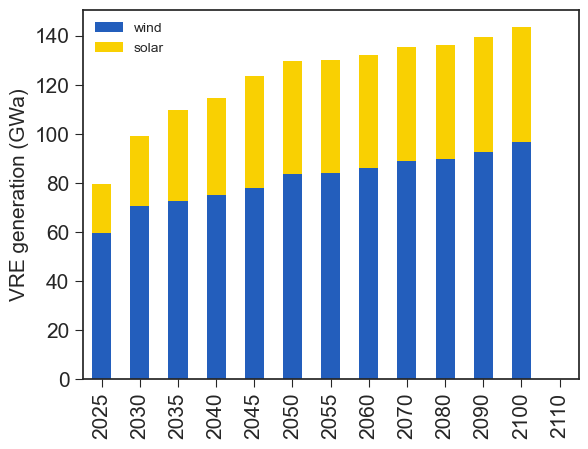

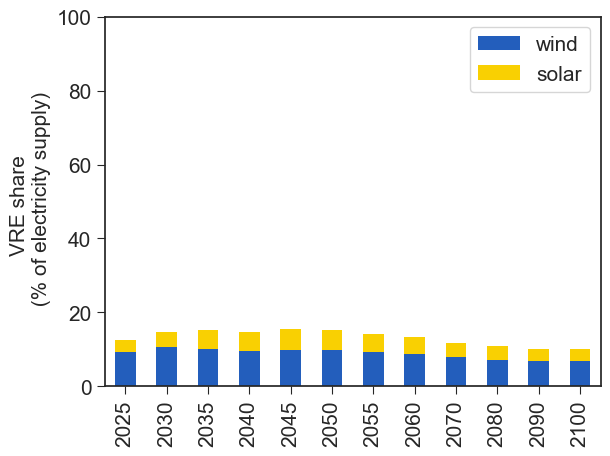

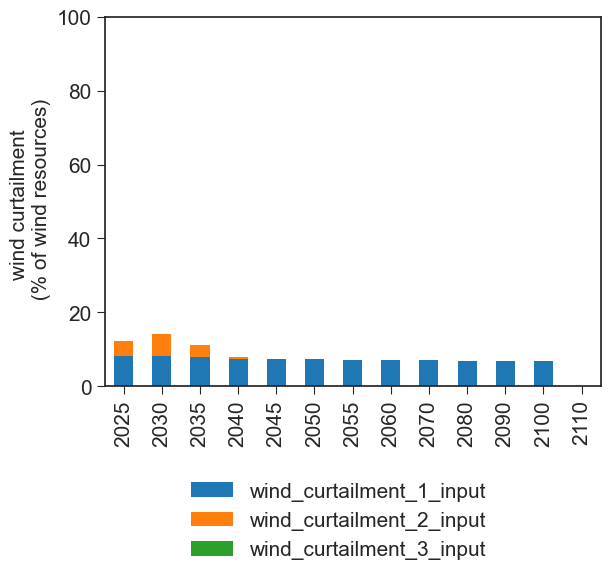

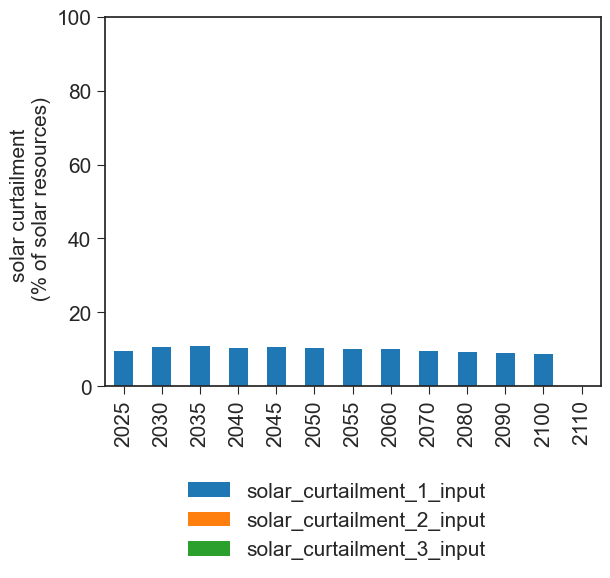

In [11]:
scenarios = {"with_curtailment":sc,
             }
regions = [
         "Europe",
           ["R11_EEU",
            "R11_WEU",
           ],
         ]
results, df_curtailment, df_generation = read_and_plot_curtailment_B(scenarios, region_name=regions)
fig2, ax2, df_vre_share_pct, act_renewables, curt_renewables = plot_gen_share_and_curtailment(sc, df_generation, df_curtailment)
df_vre_share_pct["sum"] = df_vre_share_pct.sum(axis=1)
vre_share_reference = df_vre_share_pct["sum"]
print(df_vre_share_pct.round(1))
print("")
print("Max VRE share: ",df_vre_share_pct.round(1)["sum"].max())
ax2.legend(prop={'size': fs},frameon=True)
ax2.set_xlim(-0.5,11.5)

In [34]:
df = df_vre_share_pct[["wind","solar"]].copy()
df["wind curtailment"] = curt_renewables["Wind"].sum(axis=1)
df["solar curtailment"] = curt_renewables["Solar PV"].sum(axis=1)

In [35]:
df

,wind,solar,wind curtailment,solar curtailment
2025,9.404863,3.111088,12.323633,9.591497
2030,10.511409,4.294255,14.246332,10.748862
2035,10.012658,5.102016,11.230343,10.875271
2040,9.633603,5.082650,7.905085,10.361396
2045,9.712251,5.694832,7.269683,10.633792
2050,9.834539,5.381120,7.292887,10.344657
2055,9.179522,5.013152,7.194180,10.160954
2060,8.772694,4.689379,7.149086,9.968336
2070,7.798386,4.051279,6.989468,9.514671
2080,7.229298,3.745481,6.825298,9.189261
